In [4]:
#데이터 로드
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()

#넘파이 데이터 셋을 판다스 데이터프레임으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target

'''
sepal_length 꽃받침의 길이 정보
sepal_width 꽃받침의 너비 정보
petal_length 꽃잎의 길이 정보
petal_width 꽃잎의 너비 정보 
 
target 꽃의 종류

'''

'\nsepal_length 꽃받침의 길이 정보\nsepal_width 꽃받침의 너비 정보\npetal_length 꽃잎의 길이 정보\npetal_width 꽃잎의 너비 정보 \n \ntarget 꽃의 종류\n\n'

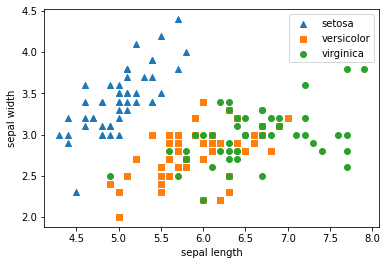

In [8]:
#데이터의 분포 확인
#세 개의 target이 있으므로
markers = ['^','s','o']

for i, marker in enumerate(markers) :
    x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
    y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [9]:
#Setosa의 경우 sepal_width가 3보다 크고 ,sepal_length가 6 이하이다.
#나머지 두 개는 섞여있다.

# PCA

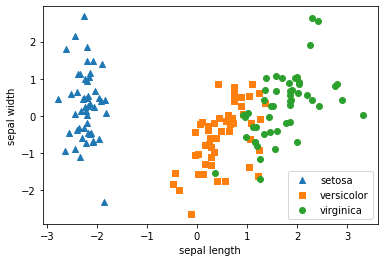

In [22]:
#PCA
#PCA는 여러 속성의 값을 연산해야 해서 속성의 스케일에 영향을 받는다.
#그래서 속성값들을 동일한 스케일로 변환해야 한다.
from sklearn.preprocessing import StandardScaler

#Target값을 제외한 모든 속성을 표준 정규분포로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

#PCA 변환
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
iris_pca = pd.DataFrame(iris_pca, columns = ['sepal_length', 'sepal_width'])
iris_pca['target'] = iris.target

#확인
markers = ['^','s','o']

for i, marker in enumerate(markers) :
    x_axis_data = iris_pca[iris_pca['target'] == i]['sepal_length']
    y_axis_data = iris_pca[iris_pca['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# LDA

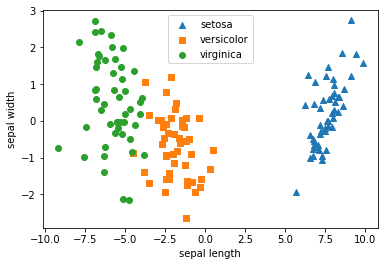

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris_scaled = StandardScaler().fit_transform(iris.data)
lda = LinearDiscriminantAnalysis(n_components = 2)

lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)

iris_lda = pd.DataFrame(iris_lda, columns = ['sepal_length', 'sepal_width'])
iris_lda['target'] = iris.target

#확인
markers = ['^','s','o']

for i, marker in enumerate(markers) :
    x_axis_data = iris_lda[iris_lda['target'] == i]['sepal_length']
    y_axis_data = iris_lda[iris_lda['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# TruncatedSVD

Text(0, 0.5, 'TruncatedSVD Component 2')

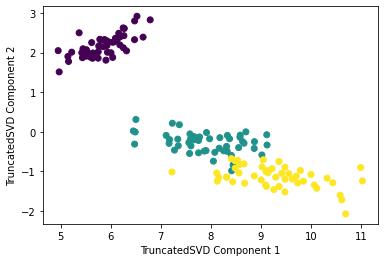

In [27]:
from sklearn.decomposition import TruncatedSVD

iris_ftrs = iris.data
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

#산점도 2차원으로 TruncatedSVD 변환된 데이터 표현
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA')

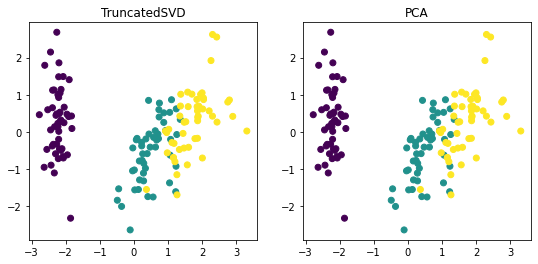

In [36]:
#TruncatedSVD와 PCA 모두 SVD를 사용해 클래스를 분해한다.
#그래서 스케일링 후 TruncatedSVD를 적용하면 PCA와 동일하게 나온다.

iris_sacled = StandardScaler().fit_transform(iris.data)

#TruncatedSVD
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

#PCA
pca = PCA(n_components = 2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('TruncatedSVD')
ax2.set_title('PCA')

# NMF

C:\Users\mkjh9\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\mkjh9\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'NMF Component 2')

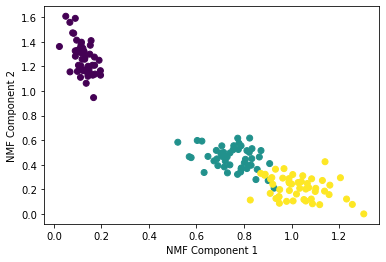

In [37]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2)
nmf.fit(iris.data)
iris_nmf = nmf.transform(iris.data)

plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')